<a href="https://colab.research.google.com/github/vaidande/ANN-MNIST/blob/master/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
#Load in the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.shape: ", X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape:  (60000, 28, 28)


In [3]:
#Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
#Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2991 - accuracy: 0.9139 - val_loss: 0.1408 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1447 - accuracy: 0.9575 - val_loss: 0.0994 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1096 - accuracy: 0.9671 - val_loss: 0.0901 - val_accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0897 - accuracy: 0.9720 - val_loss: 0.0769 - val_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9753 - val_loss: 0.0776 - val_accuracy: 0.9741
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9789 - val_loss: 0.0711 - val_accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0574 - accuracy: 0.9814 - val_loss: 0.0741 - val_accuracy:

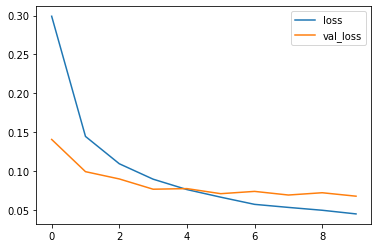

In [6]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

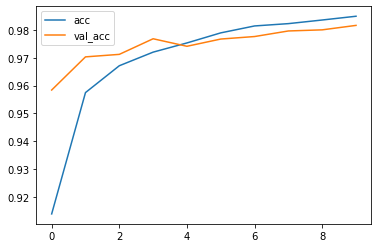

In [7]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
#Evaluate the model
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 0s 915us/step - loss: 0.0679 - accuracy: 0.9816
[0.06789626181125641, 0.9815999865531921]


Confusion matrix, without normalization
[[ 970    0    0    1    0    2    2    2    2    1]
 [   0 1128    3    0    0    0    1    0    3    0]
 [   2    1 1016    0    1    0    1    5    6    0]
 [   0    0    6  989    0    6    0    6    2    1]
 [   0    1    1    0  961    0    7    1    2    9]
 [   1    0    0    8    2  875    2    1    2    1]
 [   4    3    1    1    4    7  937    0    1    0]
 [   0    7   12    1    0    0    0 1002    1    5]
 [   3    1    2    4    5    6    1    2  948    2]
 [   0    4    0    4    7    1    0    2    1  990]]


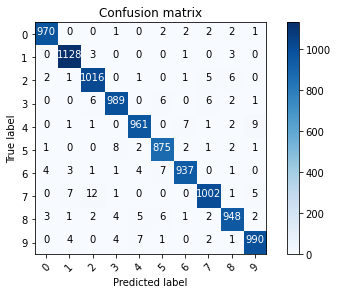

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

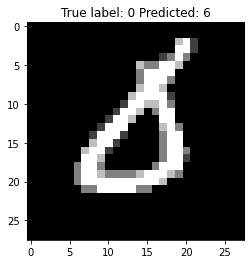

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));